In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from string import punctuation

import warnings
warnings.filterwarnings("ignore")

In [2]:
data10 = pd.read_csv('dataset-of-10s.csv')
data00 = pd.read_csv('dataset-of-00s.csv')
data60 = pd.read_csv('dataset-of-60s.csv')
data70 = pd.read_csv('dataset-of-70s.csv')
data80 = pd.read_csv('dataset-of-80s.csv')
data90 = pd.read_csv('dataset-of-90s.csv')

In [3]:
data10.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


Column description

- track: The Name of the track.

- artist: The Name of the Artist.

- uri: The resource identifier for the track.

- danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 

- energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 

- key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C?/D?, 2 = D, and so on. If no key was detected, the value is -1.

- loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 

- mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

- speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 

- acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. The distribution of values for this feature look like this:

- instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. The distribution of values for this feature look like this:

- liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

- valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

- tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 

- duration_ms:  The duration of the track in milliseconds.

- time_signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

- chorus_hit: This the the author's best estimate of when the chorus would start for the track. Its the timestamp of the start of the third section of the track. This feature was extracted from the data received by the API call for Audio Analysis of that particular track.

- sections: The number of sections the particular track has. This feature was extracted from the data received by the API call for Audio Analysis of that particular track.

- target: The target variable for the track. It can be either '0' or '1'. '1' implies that this song has featured in the weekly list (Issued by Billboards) of Hot-100 tracks in that decade at least once and is therefore a 'hit'. '0' Implies that the track is a 'flop'.

In [41]:
category = ['track','artist','key','mode','uri','time_signature']
ordinal = [i for i in data10.columns if i not in category and i != 'target']

### Hit artist based on decades.

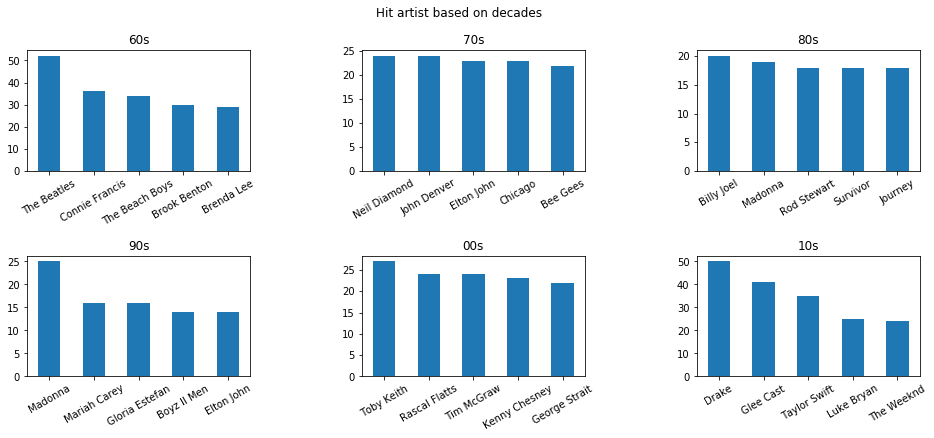

In [42]:
def artist_hits(data):
    return data[data['target']==1]['artist'].value_counts().iloc[:5].plot(kind='bar',rot=0)

data_list = [data60,data70,data80,data90,data00,data10]
judul = ['60s','70s','80s','90s','00s','10s']

plt.figure(figsize=(16,6))
plt.suptitle('Hit artist based on decades')
plt.subplots_adjust(hspace=0.7,wspace=0.5)
for i in range(len(data_list)):
    plt.subplot(2,3,i+1)
    plt.title(f'{judul[i]}')
    artist_hits(data_list[i])
    plt.xticks(rotation=30)
plt.show()

Overall, Drake and The Beatles have produced the most hit tracks.

### Non hit artist

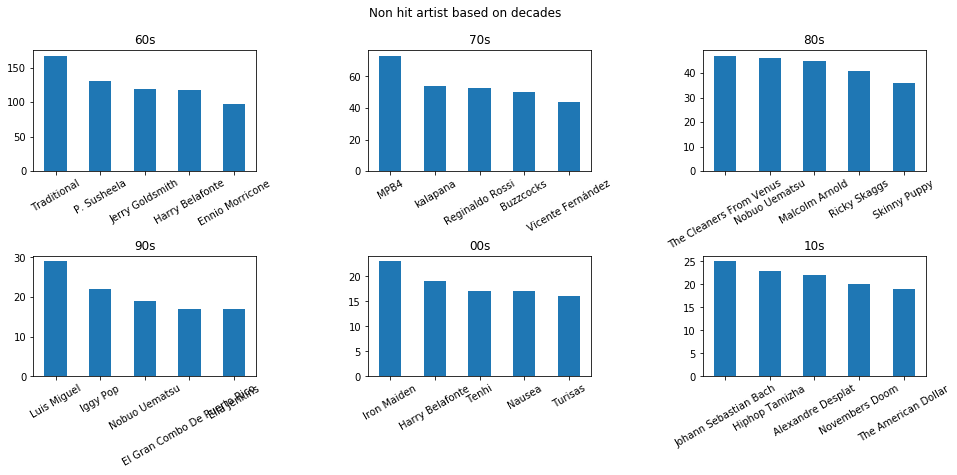

In [43]:
def non_artist_hits(data):
    return data[data['target']==0]['artist'].value_counts().iloc[:5].plot(kind='bar',rot=0)

plt.figure(figsize=(16,6))
plt.suptitle('Non hit artist based on decades')
plt.subplots_adjust(hspace=0.7,wspace=0.5)
for i in range(len(data_list)):
    plt.subplot(2,3,i+1)
    plt.title(f'{judul[i]}')
    non_artist_hits(data_list[i])
    plt.xticks(rotation=30)
plt.show()

Traditional produced the most non hit tracks by far.

In [44]:
def plot(data,columns):
    
    plt.figure(figsize=(16,12))
    plt.suptitle('Music characteristics',size=20)
    for i in range(len(ordinal)):
        temp_1 = data[data['target']==1][ordinal[i]].mean()
        temp_0 = data[data['target']==0][ordinal[i]].mean()
        
        plt.subplot(4,3,i+1)
        plt.title(f'Flop or Hit based on music {ordinal[i]}')
        plt.bar(['Flop','Hit'],[temp_0,temp_1],color=['red','green'])
        plt.ylabel(ordinal[i].capitalize())
        plt.subplots_adjust(hspace=1,wspace=1)

##### Music characteristics 1960

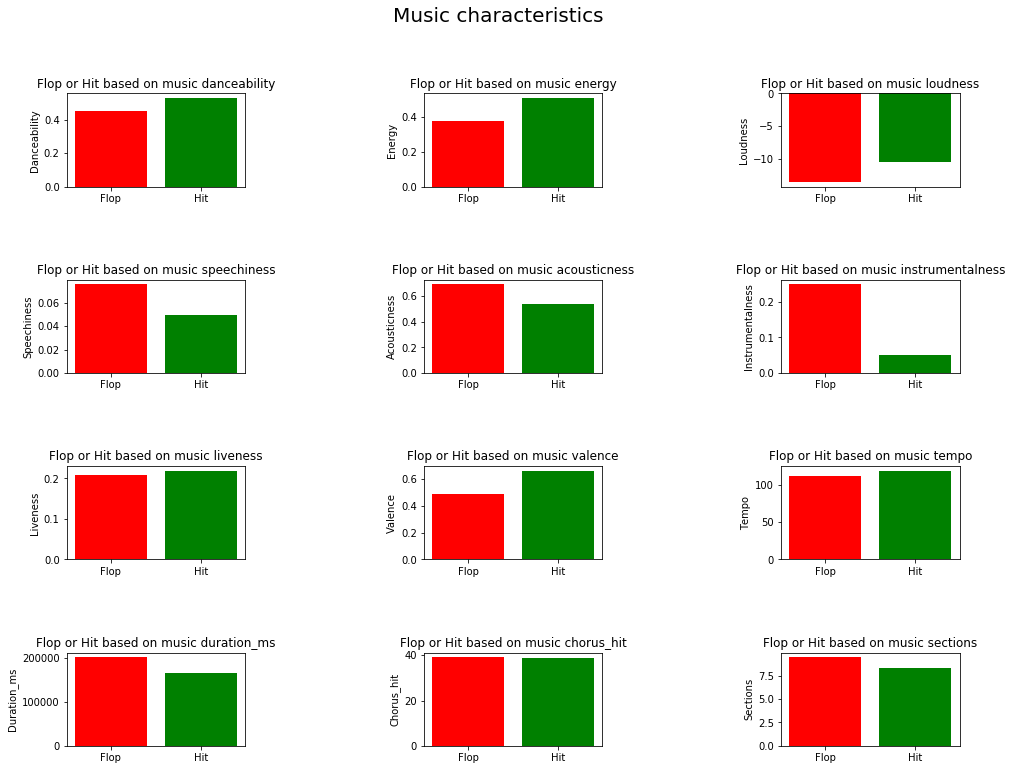

In [45]:
plot(data60,ordinal)

##### Music characteristics 1970

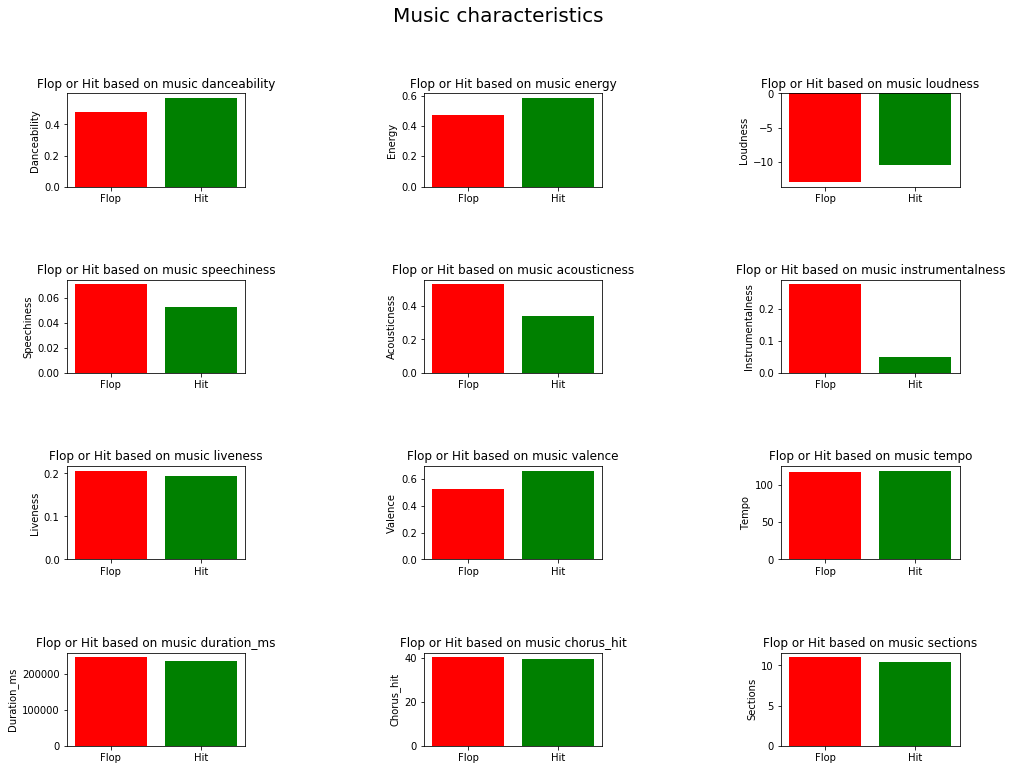

In [46]:
plot(data70,ordinal)

##### Music characteristics 1980

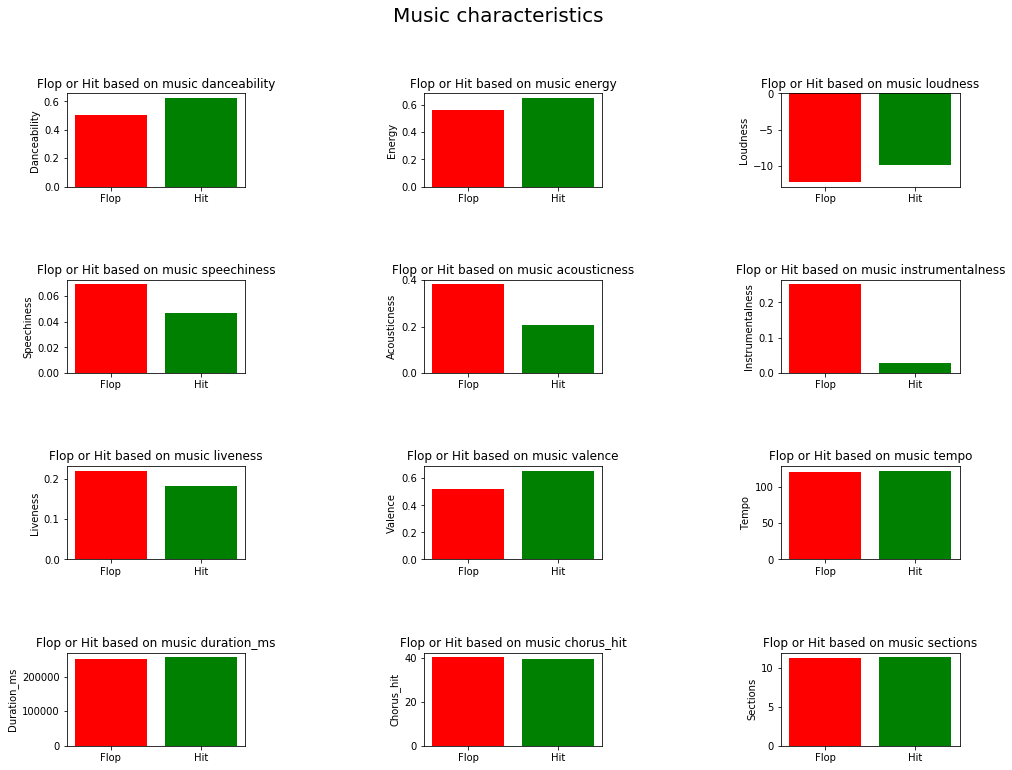

In [47]:
plot(data80,ordinal)

##### Music characteristics 1990

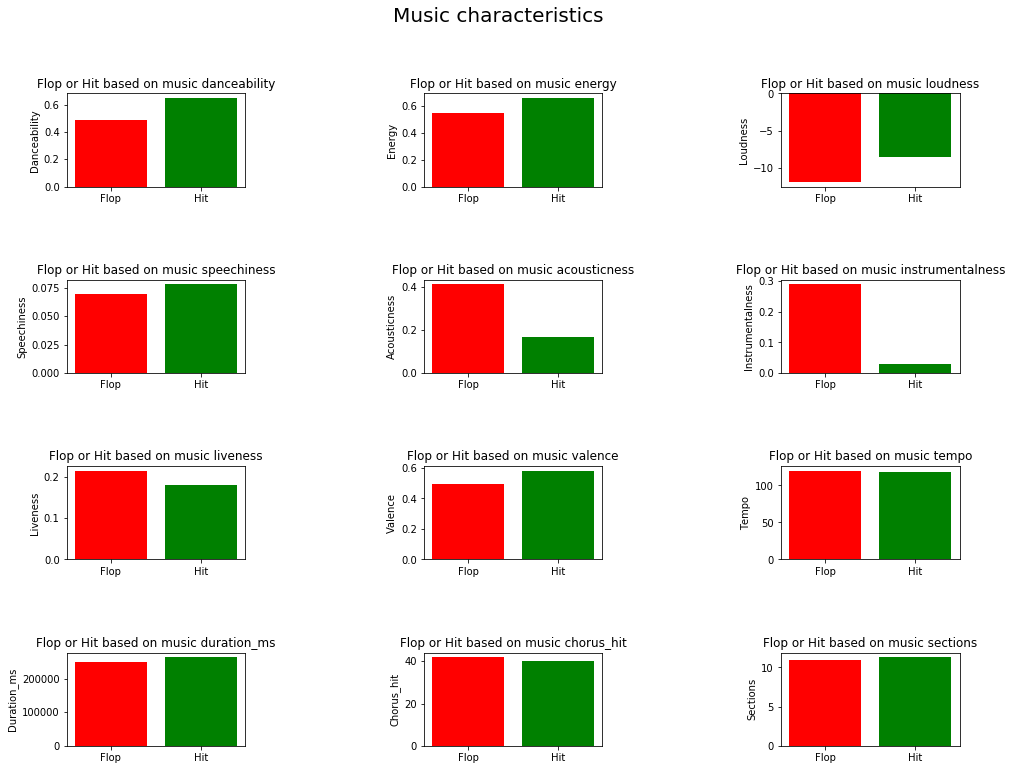

In [48]:
plot(data90,ordinal)

##### Music characteristics 2000

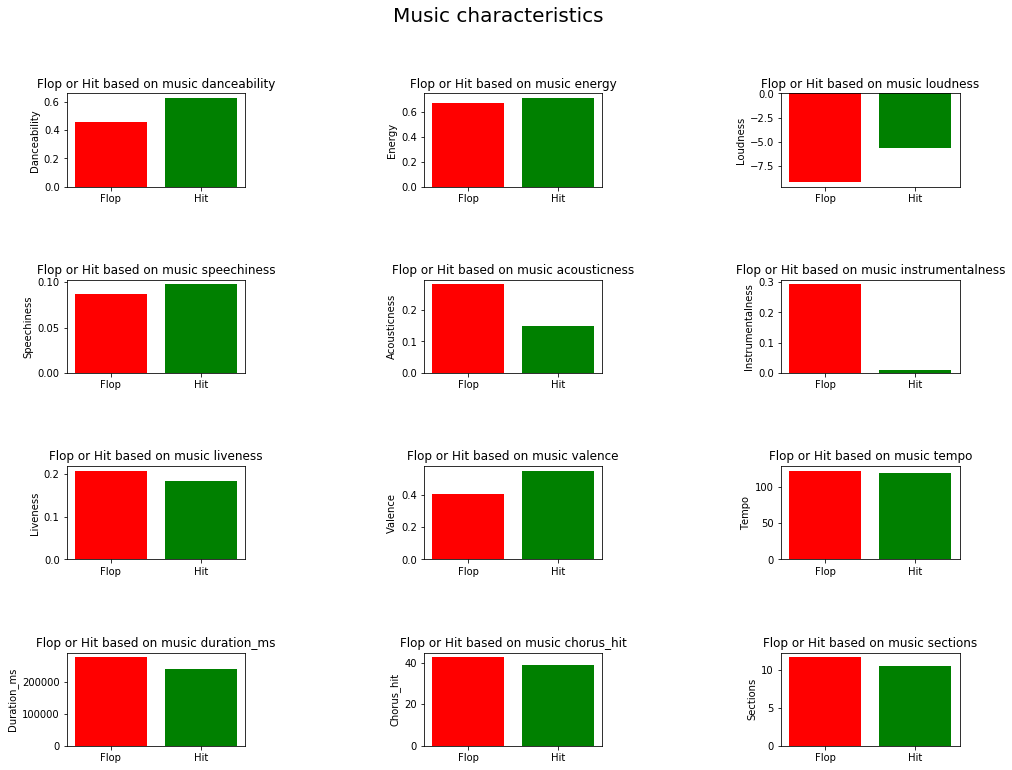

In [49]:
plot(data00,ordinal)

##### Music characteristics 2010

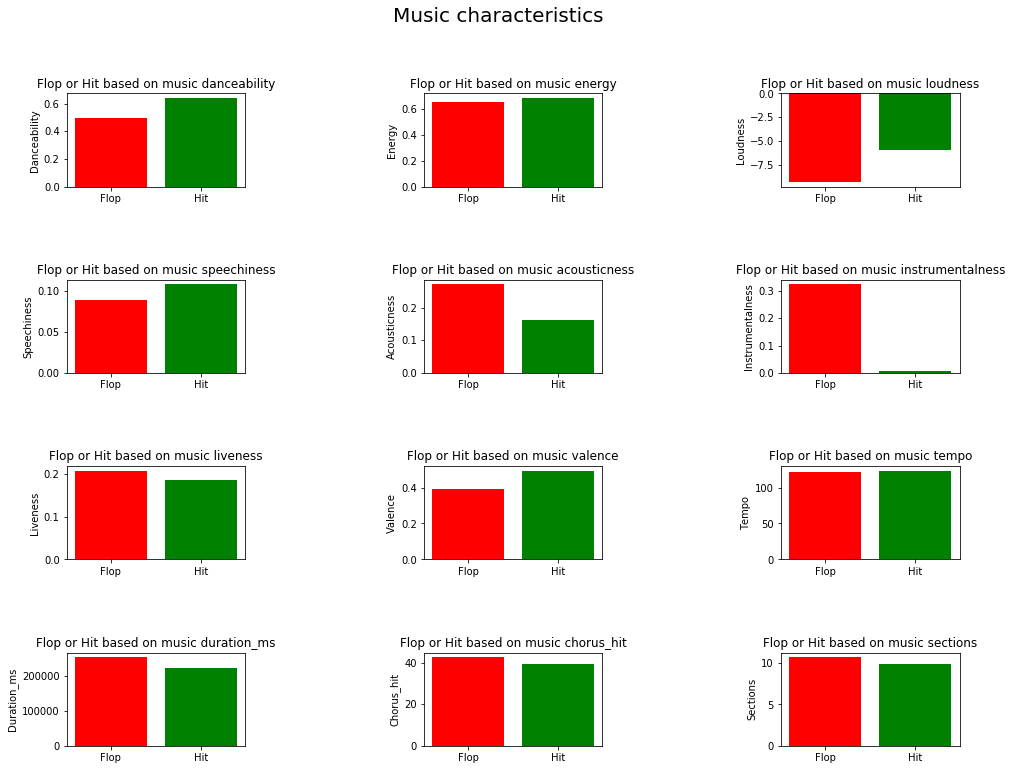

In [50]:
plot(data10,ordinal)

##### Each decade has a similar characteristic 

In [51]:
gabung = pd.concat([data60,data70,data80,data90,data00,data10],ignore_index=True)

In [52]:
gabung.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0


### Check target proportion

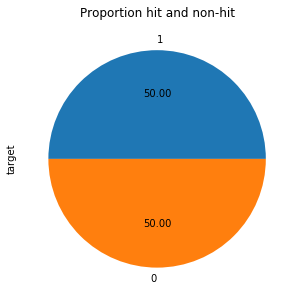

In [53]:
gabung['target'].value_counts().plot(kind='pie',autopct='%.2f',title='Proportion hit and non-hit',figsize=(12,5))
plt.show()

This dataset has a balanced proportion between hit and non-hit tracks. This will help us in creating a better classification model because our model can learn the pattern from both target equally.

In [54]:
num = ordinal
num.append('target')

In [55]:
dfAngka = gabung[num]
dfAngka.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,chorus_hit,sections,target
0,0.417,0.620,-7.727,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,32.94975,9,1
1,0.498,0.505,-12.475,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,48.82510,10,0
2,0.657,0.649,-13.392,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,37.22663,12,0
3,0.590,0.545,-12.058,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,24.75484,8,0
4,0.515,0.765,-3.515,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,21.79874,14,0


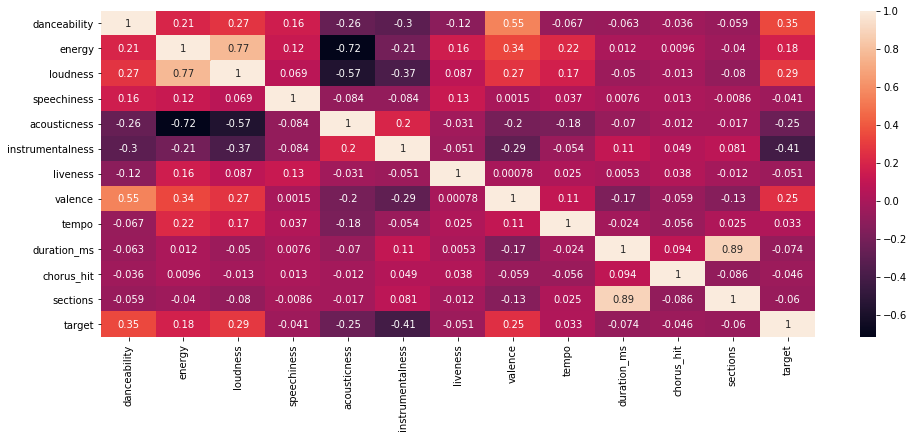

In [56]:
corr = dfAngka.corr()

plt.figure(figsize=(16,6))
sb.heatmap(corr,annot=True)
plt.show()

For this project, features which have correlation above 0.20 with target will be selected.

In [57]:
above20 = corr[((corr['target'] >= 0.20)&(corr['target']!=1))|((corr['target']<=-0.20)&(corr['target']!=1))]['target'].sort_values(ascending=True).to_dict()
above20_key = list(above20.keys())

print('Feature selected')
angka = 1
for key in above20:
    print(f'Feature {angka}: {key} {round(above20[key],2)}')
    angka+=1

Feature selected
Feature 1: instrumentalness -0.41
Feature 2: acousticness -0.25
Feature 3: valence 0.25
Feature 4: loudness 0.29
Feature 5: danceability 0.35


In [59]:
gabung[(gabung['track']=='Teenage Dream')&(gabung['artist']=='Katy Perry')][above20_key]

,instrumentalness,acousticness,valence,loudness,danceability
41103,0.000003,0.0132,0.605,-4.581,0.719


In [60]:
gabung.tail()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
41101,Lotus Flowers,Yolta,spotify:track:4t1TljQWJ6ZuoSY67zVvBI,0.172,0.358,9,-14.430,1,0.0342,0.8860,0.966000,0.314,0.0361,72.272,150857,4,24.30824,7,0
41102,Calling My Spirit,Kodak Black,spotify:track:2MShy1GSSgbmGUxADNIao5,0.910,0.366,1,-9.954,1,0.0941,0.0996,0.000000,0.261,0.7400,119.985,152000,4,32.53856,8,1
41103,Teenage Dream,Katy Perry,spotify:track:55qBw1900pZKfXJ6Q9A2Lc,0.719,0.804,10,-4.581,1,0.0355,0.0132,0.000003,0.139,0.6050,119.999,227760,4,20.73371,7,1
41104,Stormy Weather,Oscar Peterson,spotify:track:4o9npmYHrOF1rUxxTVH8h4,0.600,0.177,7,-16.070,1,0.0561,0.9890,0.868000,0.149,0.5600,120.030,213387,4,21.65301,14,0
41105,Dust,Hans Zimmer,spotify:track:2khIaVUkbMmDHB596lyMG3,0.121,0.123,4,-23.025,0,0.0443,0.9640,0.696000,0.103,0.0297,95.182,341396,4,71.05343,15,0


In [156]:
punc = punctuation
stop_words = stopwords.words('english')

<function matplotlib.pyplot.show(*args, **kw)>

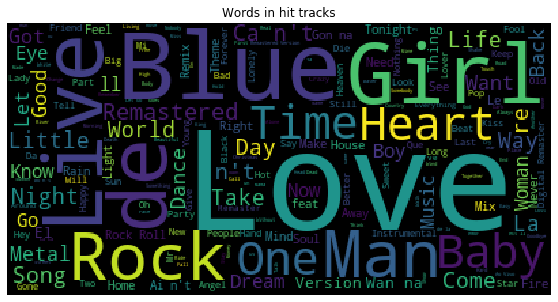

In [159]:
track_com_hit = gabung[gabung['target']==1]['track'].str.cat(sep=' ')
lemmatizer = WordNetLemmatizer()
word_lem_hit = lemmatizer.lemmatize(track_com)
token_hit = word_tokenize(word_lem_hit)
clean_token_hit = [i for i in token_hit if i not in punc and i not in stop_words]
clean_token_hit = ' '.join(clean_token_hit)

word = WordCloud().generate(clean_token_hit)
plt.figure(figsize=(16,5))
plt.title('Words in hit tracks')
plt.imshow(word)
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

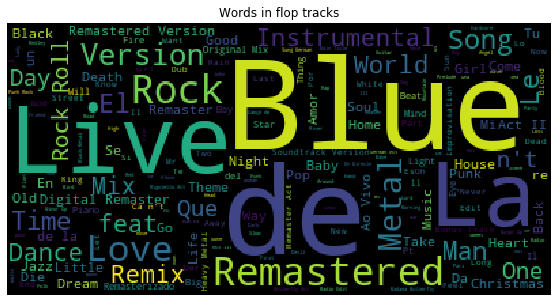

In [160]:
track_com_flop = gabung[gabung['target']==0]['track'].str.cat(sep=' ')
word_lem_flop = lemmatizer.lemmatize(track_com_flop)
token_flop = word_tokenize(word_lem_flop)
clean_token_flop = [i for i in token_flop if i not in punc and i not in stop_words]
clean_token_flop = ' '.join(clean_token_flop)

word = WordCloud().generate(clean_token_flop)
plt.figure(figsize=(16,5))
plt.title('Words in flop tracks')
plt.imshow(word)
plt.axis('off')
plt.show

In [72]:
gabung['key'] = gabung['key'].replace({0:'C',1:'C#',2:'D',3:'D#',4:'E',5:'F',6:'F#',7:'G',8:'G#',9:'A',10:'Bb',11:'B'})

### Hit track starting key

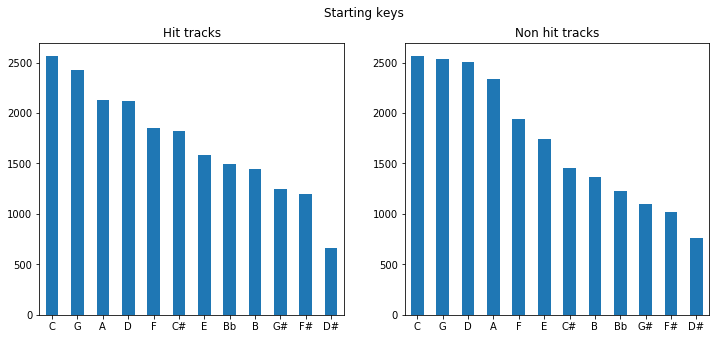

In [81]:
plt.figure(figsize=(12,5))
plt.suptitle('Starting keys')
plt.subplot(121)
plt.title('Hit tracks')
gabung[gabung['target']==1]['key'].value_counts().plot(kind='bar',rot=0)
plt.subplot(122)
plt.title('Non hit tracks')
gabung[gabung['target']==0]['key'].value_counts().plot(kind='bar',rot=0)
plt.show()

Both hit and non hit tracks have similar starting key.

In [91]:
gabung[gabung['target']==1]['mode'].value_counts(normalize=True)

1    0.730064
0    0.269936
Name: mode, dtype: float64

In [92]:
gabung[gabung['target']==0]['mode'].value_counts(normalize=True)

1    0.656644
0    0.343356
Name: mode, dtype: float64

In [109]:
data_use = above20_key
data_use.extend(['track','artist','mode','target'])

In [113]:
gabung_clean = gabung[data_use]

In [164]:
mode_dummies = pd.get_dummies(gabung_clean['mode'],prefix='mode')

In [166]:
gabung_clean = pd.concat([gabung_clean,mode_dummies],axis=1)

In [168]:
gabung_clean = gabung_clean.drop(columns=['mode'])

In [170]:
gabung_clean.to_csv('gabung.csv',index=False)